Convergence atteinte après 18 itérations en 0.0080 secondes
Solution du système :  [ 1.57499986  3.29999967 -1.32499986]


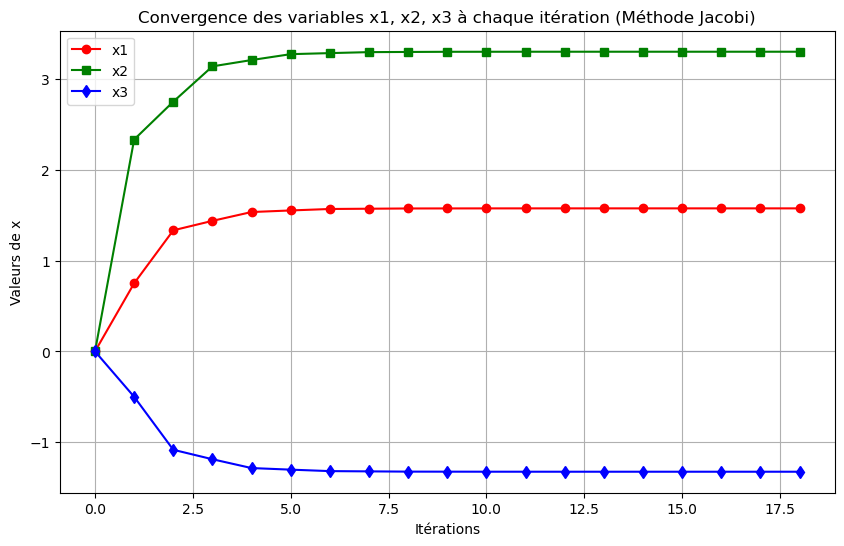

Temps total de convergence : 0.0080 secondes


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Définition du système linéaire A * x = b
A = np.array([[4, -1, 0],
              [-1, 3, 1],
              [0, 1, 4]], dtype=float)

b = np.array([3, 7, -2], dtype=float)

# Initialisation
x = np.zeros_like(b)  # Vecteur initial x = [0, 0, 0]
max_iter = 100        # Nombre maximal d'itérations
tol = 1e-6            # Tolérance pour le critère d'arrêt

# Méthode itérative de Jacobi avec sauvegarde des solutions pour illustration
def jacobi(A, b, x, tol, max_iter):
    n = len(b)
    solutions = [np.copy(x)]  # Liste pour stocker les solutions à chaque itération
    start_time = time.time()  # Mesure du temps
    
    for k in range(max_iter):
        x_new = np.copy(x)
        
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]
        
        # Enregistrer la solution courante
        solutions.append(np.copy(x_new))
        
        # Critère de convergence : différence entre deux itérations
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            end_time = time.time()
            print(f'Convergence atteinte après {k+1} itérations en {end_time - start_time:.4f} secondes')
            return x_new, solutions, end_time - start_time
        
        x = x_new
    
    end_time = time.time()
    print('Nombre maximal d\'itérations atteint')
    return x, solutions, end_time - start_time

# Résolution du système avec Jacobi
solution, solutions, time_convergence = jacobi(A, b, x, tol, max_iter)

# Affichage de la solution
print("Solution du système : ", solution)

# 1. Illustration de la convergence des solutions
iterations = range(len(solutions))
x1_values = [sol[0] for sol in solutions]
x2_values = [sol[1] for sol in solutions]
x3_values = [sol[2] for sol in solutions]

plt.figure(figsize=(10, 6))
plt.plot(iterations, x1_values, 'o-', label='x1', color='r')
plt.plot(iterations, x2_values, 's-', label='x2', color='g')
plt.plot(iterations, x3_values, 'd-', label='x3', color='b')
plt.title('Convergence des variables x1, x2, x3 à chaque itération (Méthode Jacobi)')
plt.xlabel('Itérations')
plt.ylabel('Valeurs de x')
plt.legend()
plt.grid(True)
plt.show()

# 2. Affichage du temps de convergence
print(f"Temps total de convergence : {time_convergence:.4f} secondes")


Gauss-Seidel: 10 itérations, temps de convergence: 0.0000 secondes
SOR optimal avec ω = 1.05: 7 itérations, temps de convergence: 0.0000 secondes


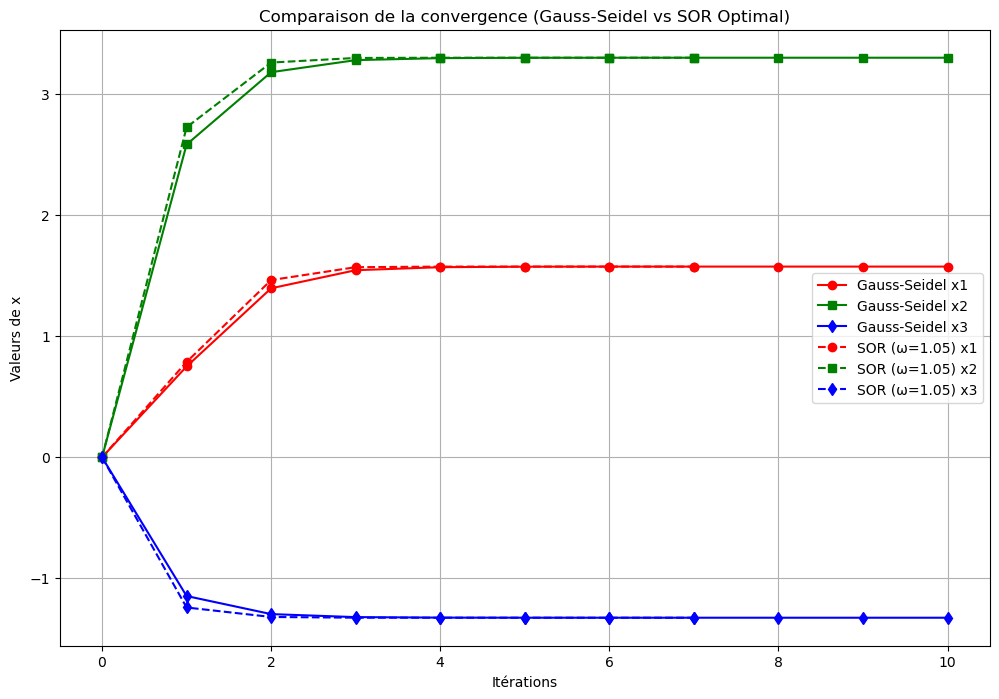

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Définition du système linéaire A * x = b
A = np.array([[4, -1, 0],
              [-1, 3, 1],
              [0, 1, 4]], dtype=float)

b = np.array([3, 7, -2], dtype=float)

# Initialisation
x_initial = np.zeros_like(b)
max_iter = 100
tol = 1e-6

# Méthode Gauss-Seidel
def gauss_seidel(A, b, x, tol, max_iter):
    n = len(b)
    solutions = [np.copy(x)]
    start_time = time.time()
    
    for k in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            sum1 = np.dot(A[i, :i], x_new[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]
        
        solutions.append(np.copy(x_new))
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            end_time = time.time()
            return x_new, solutions, k + 1, end_time - start_time
        x = x_new
    
    end_time = time.time()
    return x, solutions, max_iter, end_time - start_time

# Méthode SOR (Sur-relaxation)
def sor(A, b, x, omega, tol, max_iter):
    n = len(b)
    solutions = [np.copy(x)]
    start_time = time.time()
    
    for k in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            sum1 = np.dot(A[i, :i], x_new[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (1 - omega) * x[i] + omega * (b[i] - sum1 - sum2) / A[i, i]
        
        solutions.append(np.copy(x_new))
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            end_time = time.time()
            return x_new, solutions, k + 1, end_time - start_time
        x = x_new
    
    end_time = time.time()
    return x, solutions, max_iter, end_time - start_time

# Résolution avec Gauss-Seidel pour déterminer le nombre d'itérations de référence
x_gauss_seidel, solutions_gauss_seidel, iter_gauss_seidel, time_gauss_seidel = gauss_seidel(A, b, np.copy(x_initial), tol, max_iter)

print(f"Gauss-Seidel: {iter_gauss_seidel} itérations, temps de convergence: {time_gauss_seidel:.4f} secondes")

# Test pour trouver un facteur ω optimal pour SOR
best_omega = None
best_iterations = max_iter
best_time = None
for omega in np.arange(1.0, 2.0, 0.05):
    x_sor, solutions_sor, iter_sor, time_sor = sor(A, b, np.copy(x_initial), omega, tol, max_iter)
    
    if iter_sor < iter_gauss_seidel:
        best_omega = omega
        best_iterations = iter_sor
        best_time = time_sor
        break

print(f"SOR optimal avec ω = {best_omega:.2f}: {best_iterations} itérations, temps de convergence: {best_time:.4f} secondes")

# Tracé des courbes de convergence pour Gauss-Seidel et SOR optimal
iterations_gs = range(len(solutions_gauss_seidel))
iterations_sor = range(len(solutions_sor))

plt.figure(figsize=(12, 8))

# Gauss-Seidel
x1_gs = [sol[0] for sol in solutions_gauss_seidel]
x2_gs = [sol[1] for sol in solutions_gauss_seidel]
x3_gs = [sol[2] for sol in solutions_gauss_seidel]
plt.plot(iterations_gs, x1_gs, 'o-', label='Gauss-Seidel x1', color='r')
plt.plot(iterations_gs, x2_gs, 's-', label='Gauss-Seidel x2', color='g')
plt.plot(iterations_gs, x3_gs, 'd-', label='Gauss-Seidel x3', color='b')

# SOR Optimal
x1_sor = [sol[0] for sol in solutions_sor]
x2_sor = [sol[1] for sol in solutions_sor]
x3_sor = [sol[2] for sol in solutions_sor]
plt.plot(iterations_sor, x1_sor, 'o--', label=f'SOR (ω={best_omega:.2f}) x1', color='r')
plt.plot(iterations_sor, x2_sor, 's--', label=f'SOR (ω={best_omega:.2f}) x2', color='g')
plt.plot(iterations_sor, x3_sor, 'd--', label=f'SOR (ω={best_omega:.2f}) x3', color='b')

# Paramètres du graphique
plt.title('Comparaison de la convergence (Gauss-Seidel vs SOR Optimal)')
plt.xlabel('Itérations')
plt.ylabel('Valeurs de x')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Test des différents facteurs de relaxation ω
omega_values = np.arange(1.0, 2.0, 0.1)
best_time = float('inf')
best_omega = None
best_solution = None

for omega in omega_values:
    solution_sor, solutions_sor, time_convergence_sor = sor(A, b, x, omega, tol, max_iter)
    if time_convergence_sor < best_time:
        best_time = time_convergence_sor
        best_omega = omega
        best_solution = solution_sor

print(f'Le meilleur ω est : {best_omega} avec un temps de convergence de {best_time:.4f} secondes.')
print("Solution avec le meilleur ω (SOR) : ", best_solution)


Convergence atteinte après 10 itérations en 0.0000 secondes
Convergence atteinte après 9 itérations en 0.0000 secondes
Convergence atteinte après 11 itérations en 0.0080 secondes
Convergence atteinte après 14 itérations en 0.0000 secondes
Convergence atteinte après 18 itérations en 0.0000 secondes
Convergence atteinte après 23 itérations en 0.0000 secondes
Convergence atteinte après 31 itérations en 0.0000 secondes
Convergence atteinte après 44 itérations en 0.0000 secondes
Convergence atteinte après 69 itérations en 0.0080 secondes
Nombre maximal d'itérations atteint
Le meilleur ω est : 1.0 avec un temps de convergence de 0.0000 secondes.
Solution avec le meilleur ω (SOR) :  [ 1.57499989  3.29999993 -1.32499998]


Solution approchée : [ 3.92309452 15.28629119  2.0886342 ]
Nombre d'itérations : 100
Temps total : 0.2240 secondes


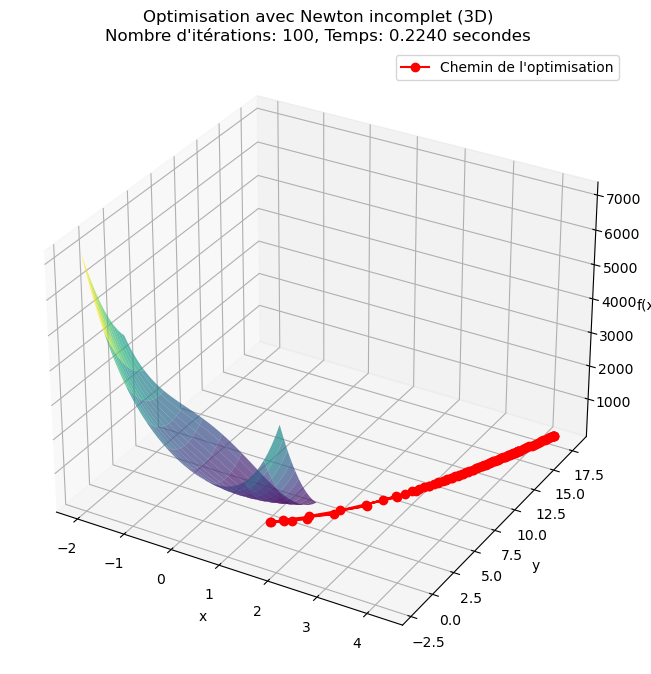

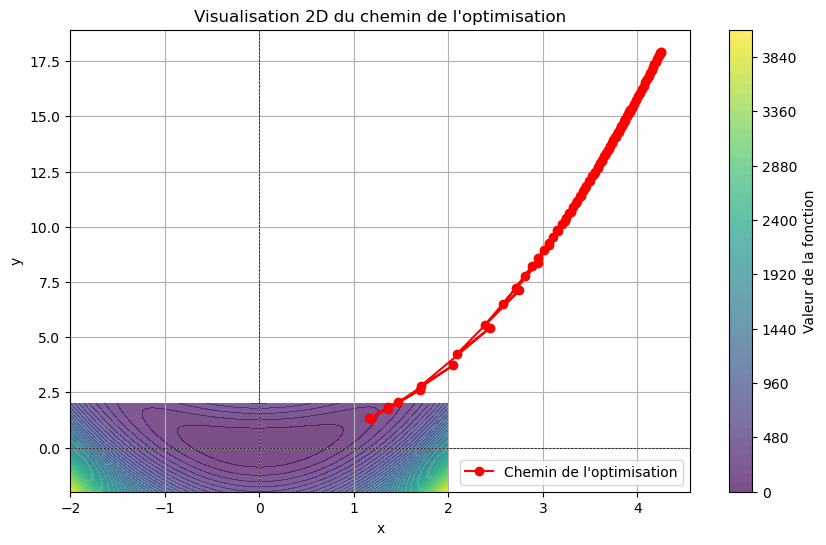

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import cg  # Gradient conjugué pour résoudre l'approximation
import time

# Définition de la fonction de Rosenbrock en 3D
def f(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2 + (1 - x[2])**2 + 100 * (x[0] - x[2]**2)**2

# Gradient de la fonction de Rosenbrock
def grad_f(x):
    dfdx = -2 * (1 - x[0]) - 400 * (x[1] - x[0]**2) * x[0] + 200 * (x[0] - x[2]**2)
    dfdy = 200 * (x[1] - x[0]**2)
    dfdz = -2 * (1 - x[2]) - 400 * (x[0] - x[2]**2) * x[2]
    return np.array([dfdx, dfdy, dfdz])

# Hessienne exacte de la fonction de Rosenbrock
def hess_f(x):
    h11 = 2 - 400 * (x[1] - 3 * x[0]**2) + 200
    h12 = -400 * x[0]
    h13 = 200
    h22 = 200
    h33 = 2 - 400 * (x[0] - 3 * x[2]**2)
    return np.array([[h11, h12, 0], [h12, h22, 0], [h13, 0, h33]])

# Algorithme de Newton incomplet avec approximation de la Hessienne
def newton_incomplet(f, grad_f, hess_f, x0, epsilon=1e-6, max_iter=100):
    x = x0
    n_iter = 0
    steps = []
    start_time = time.time()

    for k in range(max_iter):
        n_iter += 1
        g = grad_f(x)
        H = hess_f(x)

        # Résoudre approximativement H * p = -g avec la méthode du gradient conjugué
        p, info = cg(H, -g, tol=1e-3)  # Tolérance de la méthode d'approximation
        
        # Mise à jour de x
        x_new = x + p
        steps.append(x_new)
        
        # Critère d'arrêt
        if np.linalg.norm(p) < epsilon or np.linalg.norm(g) < epsilon:
            break
        
        x = x_new

    end_time = time.time()
    total_time = end_time - start_time

    return x, n_iter, steps, total_time

# Visualisation de la fonction et des étapes en 3D
def plot_results_3d(steps, f, x_range, y_range, z_range, n_iter, total_time):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Création de la grille
    X, Y, Z = np.meshgrid(np.linspace(x_range[0], x_range[1], 50), 
                          np.linspace(y_range[0], y_range[1], 50), 
                          np.linspace(z_range[0], z_range[1], 50))
    
    F = f([X, Y, Z])
    
    # Tracer la fonction
    ax.plot_surface(X[:, :, 0], Y[:, :, 0], F[:, :, 0], cmap='viridis', alpha=0.7, rstride=5, cstride=5)
    
    # Tracer les étapes de l'optimisation
    steps = np.array(steps)
    ax.plot(steps[:, 0], steps[:, 1], f(steps.T), 'ro-', label='Chemin de l\'optimisation')
    
    ax.set_title(f"Optimisation avec Newton incomplet (3D)\nNombre d'itérations: {n_iter}, Temps: {total_time:.4f} secondes")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x)')
    plt.legend()
    plt.show()

# Visualisation 2D du chemin parcouru
def plot_results_2d(steps):
    steps = np.array(steps)
    plt.figure(figsize=(10, 6))
    
    # Tracer la fonction de Rosenbrock dans le plan XY
    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f([X, Y, np.zeros_like(X)])  # Z est calculé uniquement sur le plan XY pour la visualisation
    
    plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.7)
    plt.colorbar(label='Valeur de la fonction')

    # Tracer le chemin parcouru
    plt.plot(steps[:, 0], steps[:, 1], 'ro-', label='Chemin de l\'optimisation')
    
    plt.title("Visualisation 2D du chemin de l'optimisation")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.axvline(0, color='black', linewidth=0.5, ls='--')
    plt.legend()
    plt.grid()
    plt.show()

# Application de l'algorithme
x0 = np.array([1.2, 1.2, 1.2])  # Point initial
epsilon = 1e-6  # Tolérance

# Exécution de l'algorithme
solution, n_iter, steps, total_time = newton_incomplet(f, grad_f, hess_f, x0, epsilon)

# Affichage des résultats
print(f"Solution approchée : {solution}")
print(f"Nombre d'itérations : {n_iter}")
print(f"Temps total : {total_time:.4f} secondes")

# Visualisation des résultats
plot_results_3d(steps, f, [-2, 2], [-2, 2], [-2, 2], n_iter, total_time)
plot_results_2d(steps)  # Ajout de la visualisation 2D


Solution approchée : [ 3.46720803 11.96731215  1.94495808]
Nombre d'itérations : 100
Temps total : 0.7951 secondes


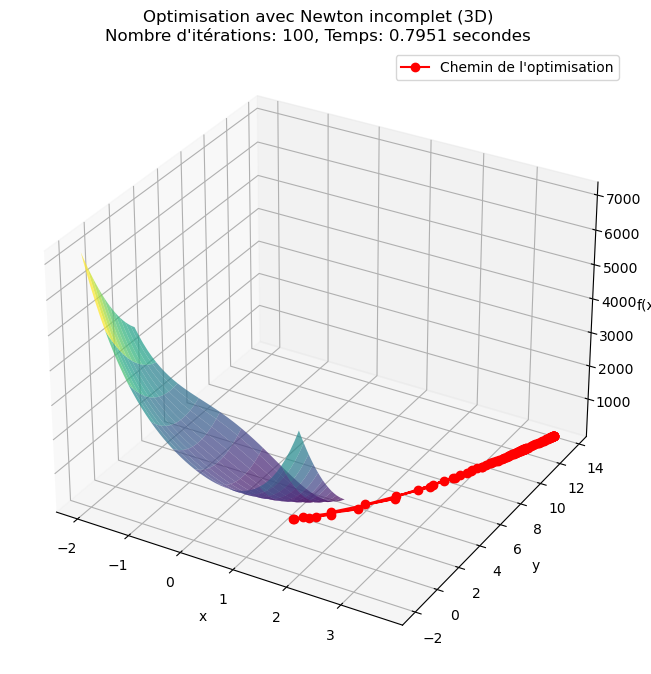

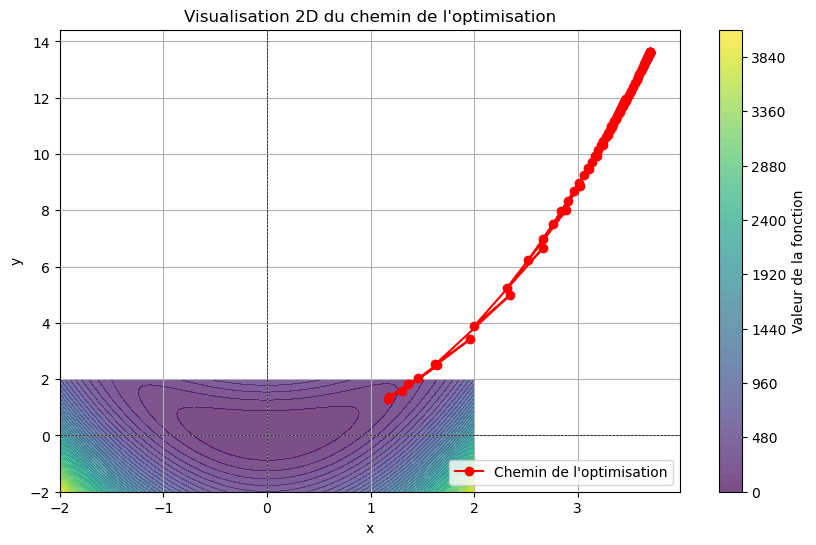

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Fonction de résolution du système linéaire avec Gauss-Seidel
def gauss_seidel(H, b, tol=1e-3, max_iter=100):
    n = len(b)
    x = np.zeros_like(b)
    
    for iteration in range(max_iter):
        x_new = np.copy(x)
        
        for i in range(n):
            sigma = sum(H[i][j] * x_new[j] if j != i else 0 for j in range(n))
            x_new[i] = (b[i] - sigma) / H[i][i]
        
        # Critère d'arrêt basé sur la tolérance
        if np.linalg.norm(x_new - x, np.inf) < tol:
            return x_new, iteration
        
        x = x_new
    
    return x, max_iter

# Algorithme de Newton incomplet avec approximation de la Hessienne utilisant Gauss-Seidel
def newton_incomplet_gauss_seidel(f, grad_f, hess_f, x0, epsilon=1e-6, max_iter=100):
    x = x0
    n_iter = 0
    steps = []
    start_time = time.time()

    for k in range(max_iter):
        n_iter += 1
        g = grad_f(x)
        H = hess_f(x)

        # Résoudre approximativement H * p = -g avec Gauss-Seidel
        p, _ = gauss_seidel(H, -g, tol=1e-3)
        
        # Mise à jour de x
        x_new = x + p
        steps.append(x_new)
        
        # Critère d'arrêt
        if np.linalg.norm(p) < epsilon or np.linalg.norm(g) < epsilon:
            break
        
        x = x_new

    end_time = time.time()
    total_time = end_time - start_time

    return x, n_iter, steps, total_time

# Application de l'algorithme
x0 = np.array([1.2, 1.2, 1.2])  # Point initial
epsilon = 1e-6  # Tolérance

# Exécution de l'algorithme
solution, n_iter, steps, total_time = newton_incomplet_gauss_seidel(f, grad_f, hess_f, x0, epsilon)

# Affichage des résultats
print(f"Solution approchée : {solution}")
print(f"Nombre d'itérations : {n_iter}")
print(f"Temps total : {total_time:.4f} secondes")

# Visualisation des résultats
plot_results_3d(steps, f, [-2, 2], [-2, 2], [-2, 2], n_iter, total_time)
plot_results_2d(steps)


Point de départ : 0.5
Point de minimum trouvé : -0.807703072048607
Valeur minimale : 0.8487380080004762
Nombre d'itérations : 10


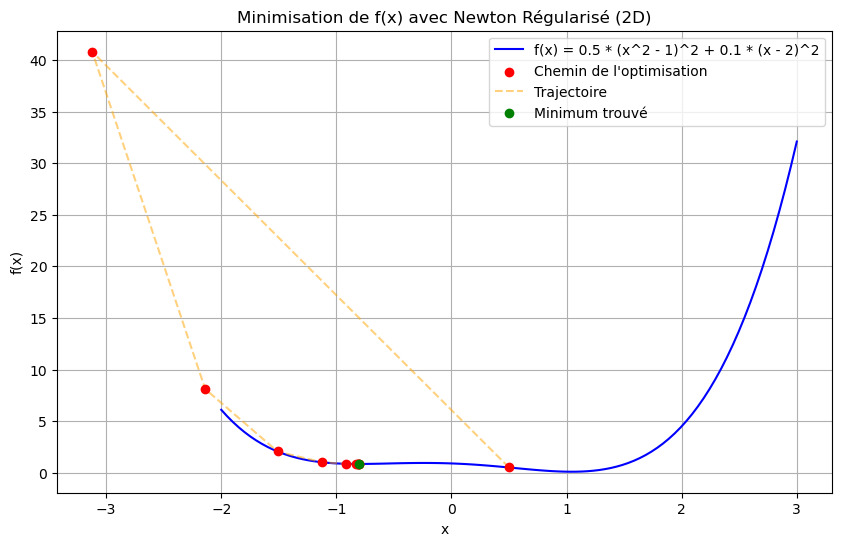

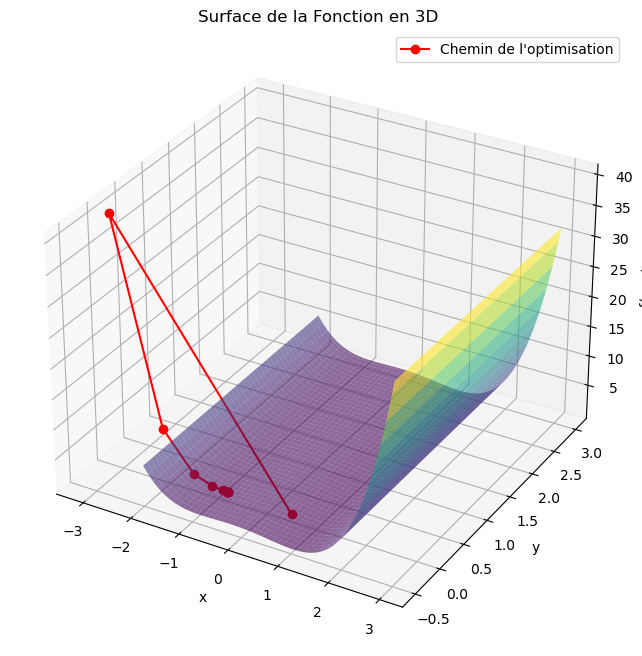

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définir la fonction à minimiser
def f(x):
    return 0.5 * (x**2 - 1)**2 + 0.1 * (x - 2)**2

# Définir la dérivée première
def grad_f(x):
    return 2 * (x**2 - 1) * x + 0.2 * (x - 2)

# Définir la dérivée seconde
def hess_f(x):
    return 2 * (3 * x**2 - 1) + 0.2  # Hessien régulier

# Méthode de Newton régularisée
def newton_regularized(x0, lambda_reg=0.01, tol=1e-6, max_iter=100):
    x = x0
    path = [x]  # Suivre le chemin des points
    for i in range(max_iter):
        gradient = grad_f(x)
        hessian = hess_f(x) + lambda_reg  # Ajouter la régularisation
        step = -gradient / hessian  # Calculer le pas
        x = x + step  # Mettre à jour x
        path.append(x)  # Ajouter le point au chemin

        # Vérification de la convergence
        if np.abs(step) < tol:
            break

    return x, i + 1, path  # Retourner le minimum, le nombre d'itérations et le chemin

# Point de départ
x0 = 0.5

# Résoudre le problème
x_min, num_iterations, path = newton_regularized(x0)

# Afficher les résultats
print(f"Point de départ : {x0}")
print(f"Point de minimum trouvé : {x_min}")
print(f"Valeur minimale : {f(x_min)}")
print(f"Nombre d'itérations : {num_iterations}")

# Tracer la fonction 2D
x = np.linspace(-2, 3, 100)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = 0.5 * (x^2 - 1)^2 + 0.1 * (x - 2)^2', color='blue')
plt.scatter(path, f(np.array(path)), color='red', zorder=5, label='Chemin de l\'optimisation', marker='o')
plt.plot(path, f(np.array(path)), color='orange', linestyle='--', label='Trajectoire', alpha=0.5)
plt.scatter(x_min, f(x_min), color='green', zorder=5, label='Minimum trouvé')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Minimisation de f(x) avec Newton Régularisé (2D)')
plt.legend()
plt.grid()
plt.show()

# Tracer la fonction en 3D
X = np.linspace(-2, 3, 100)
Y = np.linspace(-0.5, 3, 100)
X, Y = np.meshgrid(X, Y)
Z = 0.5 * (X**2 - 1)**2 + 0.1 * (X - 2)**2  # Fonction à minimiser

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Surface de la Fonction en 3D')

# Traçage du chemin de l'optimisation
path_y = np.zeros_like(path)  # Ajout d'une dimension y pour le chemin
ax.plot(path, path_y, f(np.array(path)), color='red', marker='o', label='Chemin de l\'optimisation')

plt.legend()
plt.show()


Solution approchée : [0. 0.]
Nombre d'itérations : 3
Temps total : 0.0010 secondes


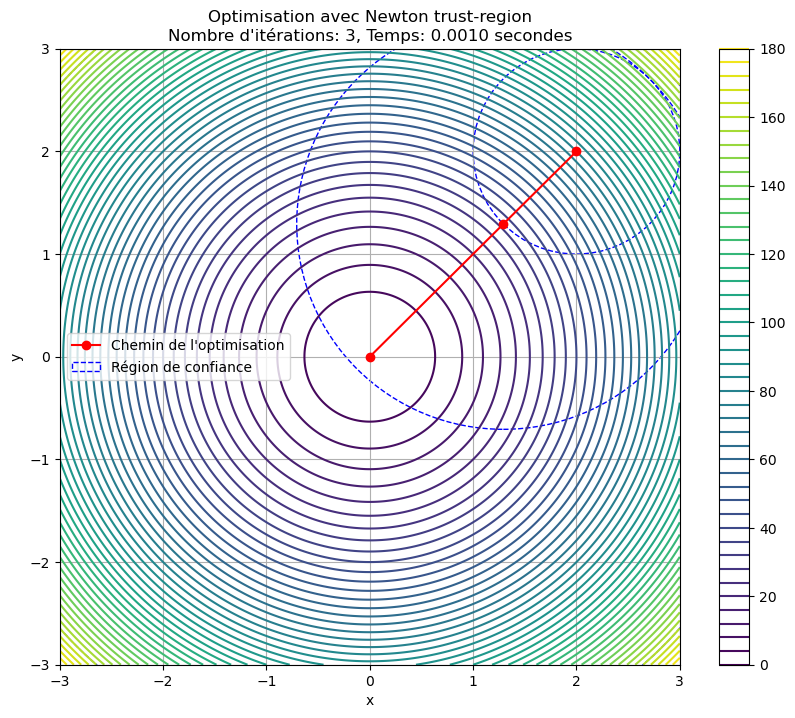

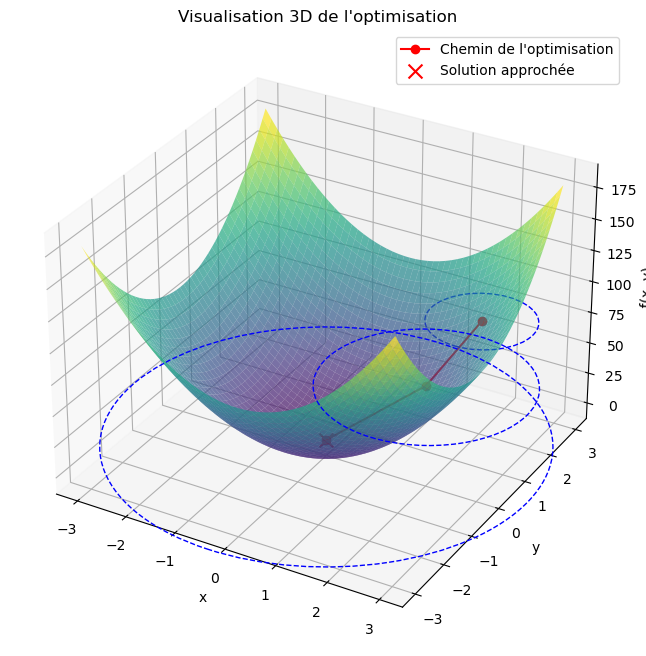

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Pour la visualisation 3D
from mpl_toolkits.mplot3d import art3d  # Pour les cercles en 3D
import time

# Définition de la fonction quadratique
def f(x):
    """Fonction quadratique à minimiser."""
    return 10 * (x[0]**2 + x[1]**2)

# Gradient de la fonction
def grad_f(x):
    """Calcul du gradient de la fonction."""
    return np.array([20 * x[0], 20 * x[1]])

# Hessienne de la fonction
def hess_f(x):
    """Calcul de la Hessienne de la fonction."""
    return np.array([[20, 0], [0, 20]])

# Algorithme de Newton avec trust-region
def newton_trust_region(f, grad_f, hess_f, x0, delta=1.0, epsilon=1e-6, max_iter=100):
    """Implémentation de l'algorithme de Newton avec une région de confiance.

    Args:
        f (callable): Fonction à minimiser.
        grad_f (callable): Fonction calculant le gradient de f.
        hess_f (callable): Fonction calculant la Hessienne de f.
        x0 (np.array): Point de départ pour l'optimisation.
        delta (float): Rayon initial de la région de confiance.
        epsilon (float): Tolérance pour le critère d'arrêt.
        max_iter (int): Nombre maximum d'itérations.

    Returns:
        tuple: Solution approchée, nombre d'itérations, étapes, régions de confiance, temps total.
    """
    x = x0
    n_iter = 0
    trust_regions = []
    steps = []
    start_time = time.time()

    for k in range(max_iter):
        n_iter += 1
        g = grad_f(x)
        H = hess_f(x)

        # Résolution du sous-problème de la région de confiance
        try:
            p = -np.linalg.solve(H, g)  # Direction Newton classique
        except np.linalg.LinAlgError:
            print("Erreur: La Hessienne est non inversible.")
            break
        
        # Vérification de la région de confiance
        if np.linalg.norm(p) > delta:
            p = p * (delta / np.linalg.norm(p))  # Restreindre à la région de confiance
        
        # Mise à jour de x
        x_new = x + p
        
        # Sauvegarder pour visualisation
        trust_regions.append(delta)
        steps.append(x)

        # Critère d'arrêt
        if np.linalg.norm(p) < epsilon or np.linalg.norm(g) < epsilon:
            break
        
        # Ajustement du rayon de la région de confiance
        reduction = f(x) - f(x_new)
        if reduction > 0:  # Si la fonction diminue, augmenter delta
            delta = min(2 * delta, 10)
            x = x_new
        else:  # Sinon, réduire delta
            delta /= 2

    end_time = time.time()
    total_time = end_time - start_time

    return x, n_iter, steps, trust_regions, total_time

# Visualisation de la fonction et des étapes en 2D
def plot_results_2d(steps, trust_regions, f, x_range, y_range, n_iter, total_time):
    """Visualisation des résultats en 2D.

    Args:
        steps (list): Liste des étapes de l'optimisation.
        trust_regions (list): Liste des rayons de la région de confiance.
        f (callable): Fonction à minimiser.
        x_range (list): Plage pour l'axe x.
        y_range (list): Plage pour l'axe y.
        n_iter (int): Nombre d'itérations.
        total_time (float): Temps total d'exécution.
    """
    X, Y = np.meshgrid(np.linspace(x_range[0], x_range[1], 400), np.linspace(y_range[0], y_range[1], 400))
    Z = f([X, Y])

    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    
    # Tracer les étapes
    steps = np.array(steps)
    plt.plot(steps[:, 0], steps[:, 1], 'ro-', label='Chemin de l\'optimisation')
    
    # Tracer les régions de confiance
    for i, (step, delta) in enumerate(zip(steps, trust_regions)):
        circle = plt.Circle((step[0], step[1]), delta, color='b', fill=False, linestyle='--', label='Région de confiance' if i == 0 else "")
        plt.gca().add_artist(circle)

    plt.colorbar()
    plt.title(f"Optimisation avec Newton trust-region\nNombre d'itérations: {n_iter}, Temps: {total_time:.4f} secondes")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show()

# Visualisation de la fonction en 3D
def plot_results_3d(steps, trust_regions, f, x_range, y_range, solution):
    """Visualisation des résultats en 3D.

    Args:
        steps (list): Liste des étapes de l'optimisation.
        trust_regions (list): Liste des rayons de la région de confiance.
        f (callable): Fonction à minimiser.
        x_range (list): Plage pour l'axe x.
        y_range (list): Plage pour l'axe y.
        solution (np.array): Solution approchée.
    """
    X, Y = np.meshgrid(np.linspace(x_range[0], x_range[1], 400), np.linspace(y_range[0], y_range[1], 400))
    Z = f([X, Y])

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

    # Tracer les étapes
    steps = np.array(steps)
    ax.plot(steps[:, 0], steps[:, 1], f(steps.T), 'ro-', label='Chemin de l\'optimisation')

    # Tracer la solution
    ax.scatter(solution[0], solution[1], f(solution), color='r', s=100, label='Solution approchée', marker='x')

    # Tracer les régions de confiance
    for step, delta in zip(steps, trust_regions):
        circle = plt.Circle((step[0], step[1]), delta, color='b', fill=False, linestyle='--')
        ax.add_patch(circle)
        art3d.pathpatch_2d_to_3d(circle, z=f(step), zdir='z')

    ax.set_title("Visualisation 3D de l'optimisation")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.legend()
    plt.show()

# Application de l'algorithme
def run_optimization():
    """Fonction principale pour exécuter l'optimisation."""
    x0 = np.array([2, 2])  # Point initial
    delta = 1.0  # Rayon initial
    epsilon = 1e-6  # Tolérance

    # Exécution de l'algorithme
    solution, n_iter, steps, trust_regions, total_time = newton_trust_region(f, grad_f, hess_f, x0, delta, epsilon)

    # Affichage des résultats
    print(f"Solution approchée : {solution}")
    print(f"Nombre d'itérations : {n_iter}")
    print(f"Temps total : {total_time:.4f} secondes")

    # Visualisation des résultats en 2D
    plot_results_2d(steps, trust_regions, f, [-3, 3], [-3, 3], n_iter, total_time)

    # Visualisation des résultats en 3D
    plot_results_3d(steps, trust_regions, f, [-3, 3], [-3, 3], solution)

# Exécuter l'optimisation
run_optimization()


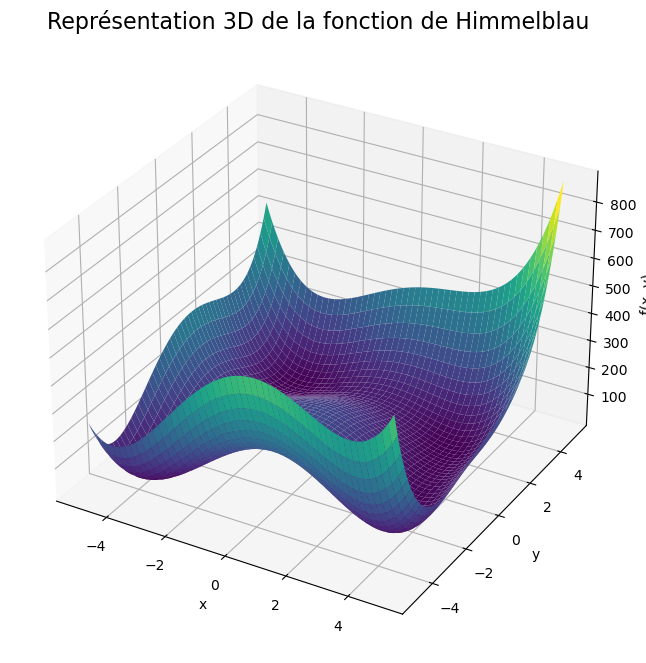

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fonction de Himmelblau
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Création de la grille de points pour la fonction
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

# Création de la figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracé de la surface 3D
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Titre et labels des axes
ax.set_title("Représentation 3D de la fonction de Himmelblau", fontsize=16)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.show()


Solution trouvée : [3. 2.]
Nombre d'itérations : 9


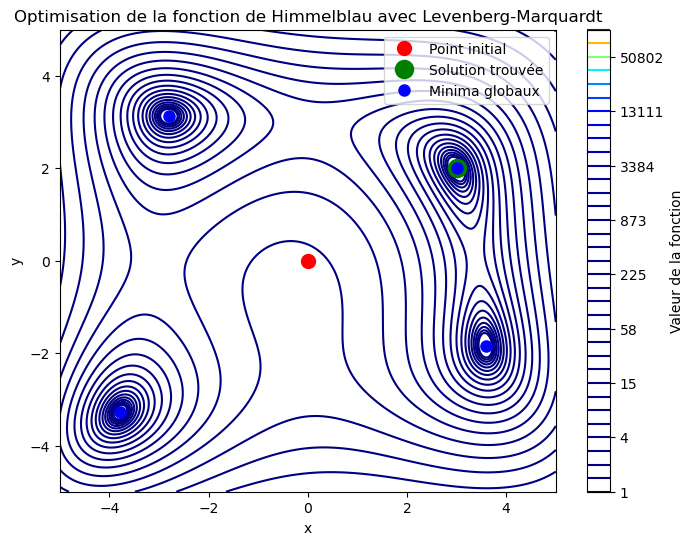

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import least_squares

# Fonction de Himmelblau modifiée avec deux résidus
def himmelblau(x):
    return np.array([x[0]**2 + x[1] - 11, x[0] + x[1]**2 - 7])

# Gradient de la fonction de Himmelblau
def himmelblau_jacobian(x):
    jac = np.zeros((2, 2))
    jac[0, 0] = 2 * x[0]
    jac[0, 1] = 1
    jac[1, 0] = 1
    jac[1, 1] = 2 * x[1]
    return jac

# Point initial loin d'un minimum global
x0 = np.array([0, 0])

# Utilisation de la méthode Levenberg-Marquardt avec 'lm'
result = least_squares(himmelblau, x0, jac=himmelblau_jacobian, method='lm')

# Affichage des résultats
print(f"Solution trouvée : {result.x}")
print(f"Nombre d'itérations : {result.nfev}")

# Création de la grille de points pour la fonction de Himmelblau
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2


# Graphique de la fonction de Himmelblau
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')

# Point initial
plt.plot(x0[0], x0[1], 'ro', markersize=10, label='Point initial')

# Solution trouvée
plt.plot(result.x[0], result.x[1], 'go', markersize=12, label='Solution trouvée', markeredgewidth=2)

# Minima globaux de la fonction de Himmelblau
minima = np.array([[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584428, -1.848126]])
plt.plot(minima[:, 0], minima[:, 1], 'bo', markersize=8, label='Minima globaux')

# Mise en forme du graphique
plt.title("Optimisation de la fonction de Himmelblau avec Levenberg-Marquardt")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar(label='Valeur de la fonction')

# Affichage du graphique
plt.show()
